Dataset : 

https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

We can directly get dataset using url : https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all libraries needed
import urllib.request
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
# download the zip from the website and unzip it
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip'
filehandle, _ = urllib.request.urlretrieve(url)
zip_file_object = zipfile.ZipFile(filehandle, 'r')
first_file = zip_file_object.namelist()[1]
file = zip_file_object.open(first_file)
obesity_pd = pd.read_csv(file)

In the following lines, we are going to describe dataset to understand it

# data cleaning

In [4]:
# show data structure
obesity_pd

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


The following it the attribute of the data set:

Gender: Male or female
<br>Age: age of the participant in years old between 14 and 61
<br>Height: height of the participant in meters
<br>Weight: weight of the participant in kilograms
<br>family_history_with_overweight: if family member suffer from overweight before
<br>FAVC: Frequent consumption of high caloric food
<br>FCVC: Frequency of consumption of vegetables
<br>NPC: Number of main meals
<br>CAEC: Consumption of food between meals
<br>SMOKE: Id participant smoke or not
<br>CH20: Consumption of water daily
<br>SCC: Calories consumption monitoring
<br>FAF: Physical activity frequency
<br>TUE: Time using technology devices
<br>CALC: Consumption of alcohol
<br>MTRANS: Transportation used
<br>NObeyesdad: Type of obeserity 

In [5]:
# print the statistic summary
obesity_pd.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
obesity_pd.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
obesity_pd.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Since our data come from a well-conduct experienment, it makes sense if there is no null data, but we could not garantee that there is not error data, so we decided to explore data in detial

In [8]:
# check values for each col
col_name = obesity_pd.columns.values.tolist()
print(col_name)
for col in col_name:
    print("\n")
    print(obesity_pd[col].value_counts(dropna=False))

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


Male      1068
Female    1043
Name: Gender, dtype: int64


18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64


1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64


80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64


yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


yes    1866
no      245


There are two type of data: Quantitive: age, height, and weight, the age data should only contain integral by how the survey was conduct. And all other data are qualitative, should even it is norminal, it is impossible to have float, so we are going to dircard any norminal data hasa non-integral rows. 

In [9]:
col_name

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [10]:
# First, we manually calculate IBM which is the numebr used to rate obersity
obesity_pd['BMI'] = obesity_pd['Weight'] / ((obesity_pd['Height'])*(obesity_pd['Height']))

# round the age col and make it int, and round other quantitive value
obesity_pd['Age'] = obesity_pd['Age'].apply(lambda x: round(x, 0))
obesity_pd['Age'] = obesity_pd['Age'].astype(int) 
obesity_pd['Height'] = obesity_pd['Height'].apply(lambda x: round(x, 2))
obesity_pd['Weight'] = obesity_pd['Weight'].apply(lambda x: round(x, 2))
obesity_pd['BMI'] = obesity_pd['BMI'].apply(lambda x: round(x, 2))

# for the col in TUE and FAF, we could see the min is 0, mismatch with othernominal col start with 0, make them consist will help cleaning
obesity_pd['FAF'] = obesity_pd['FAF'] + 1
obesity_pd['TUE'] = obesity_pd['TUE'] + 1


def noimnal_data(obesity_pd, col_name,nom_list):
    '''
    Replaces numerical values in a specified column of a pandas DataFrame 
    with corresponding string values given in a list.

    
    Parameters:
    obesity_pd (pandas.DataFrame): The dataframe to be updated.
    col_name (str): The name of the column in which numerical values are to be replaced.
    nom_list (list): A list of string values that correspond to the numerical values in the column.
    
    Returns:
    pandas.DataFrame: The updated dataframe.
    '''
    # there are 1-max 4 choice from the survey
    obesity_pd = obesity_pd[(obesity_pd[col_name] != 1) | (obesity_pd[col_name] != 2) |
                              (obesity_pd[col_name] != 3) |(obesity_pd[col_name] != 4)]
    obesity_pd[col_name] = obesity_pd[col_name].astype(int)


    for i in range(len(nom_list)):
        obesity_pd[col_name] = obesity_pd[col_name].replace(i+1, nom_list[i])
    obesity_pd[col_name] = obesity_pd[col_name].astype('string')
    
    return obesity_pd

# test case: obesity_pd = noimnal_data(obesity_pd, "FCVC", ["Never", "Sometime", "Always"]) pass

# the following the all the list of nominal value record as number with their coresponse answer from the survery
choice_diction={"FCVC":["Never","Sometimes","Always"],
                "NCP":["One","Two","Three", "Four"],
                "CH2O":["1L<","1L-2L","<2L"],
                "FAF":["None","1-2","2-4","<4"],
                "TUE":["0-2 hr", "3-5 hr", "<5hr"]}
    
for key,num in choice_diction.items():
    obesity_pd = noimnal_data(obesity_pd, key,num)
    

In [11]:
#  prints the value counts for each column in the col_name list.
for col in col_name:
    print("\n")
    print(obesity_pd[col].value_counts(dropna=False))



Male      1068
Female    1043
Name: Gender, dtype: int64


21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
41     20
28     20
16     20
35     19
40     19
44      6
36      6
42      6
55      5
45      3
43      3
46      2
51      2
48      1
61      1
14      1
56      1
15      1
52      1
47      1
Name: Age, dtype: int64


1.70    125
1.75    122
1.62     96
1.76     96
1.65     88
1.60     77
1.72     76
1.63     75
1.77     71
1.71     68
1.74     66
1.67     66
1.64     66
1.79     65
1.78     64
1.61     62
1.68     61
1.80     59
1.66     58
1.69     54
1.82     50
1.73     43
1.84     40
1.56     39
1.81     39
1.85     39
1.83     35
1.55     32
1.57     30
1.59     29
1.58     27
1.53     27
1.87     22
1.86     21
1.54     20
1.52     19
1.50     17
1.91     12
1.51     11
1.88     10
1.90      7
1.89      7
1.93     

In [12]:
# print the statistic summary
obesity_pd.describe()

,Age,Height,Weight,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,29.700137
std,6.357078,0.093368,26.191163,8.011354
min,14.000000,1.450000,39.000000,13.000000
25%,20.000000,1.630000,65.470000,24.325000
50%,23.000000,1.700000,83.000000,28.720000
75%,26.000000,1.770000,107.430000,36.015000
max,61.000000,1.980000,173.000000,50.810000


# data visualization 

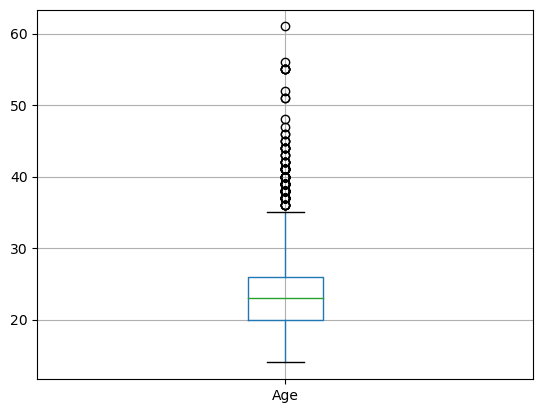

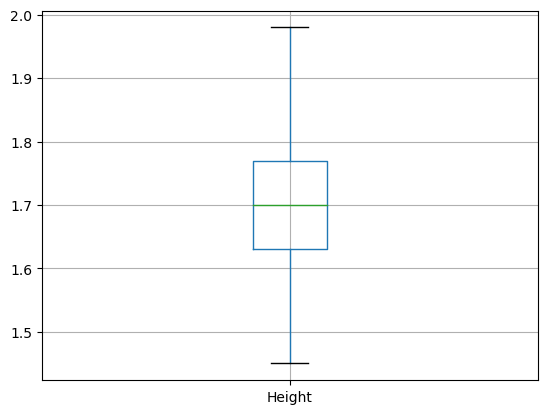

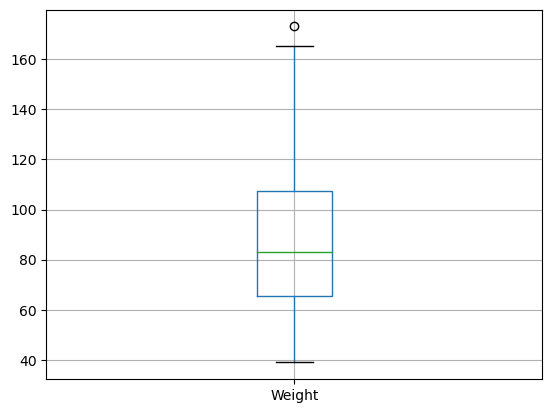

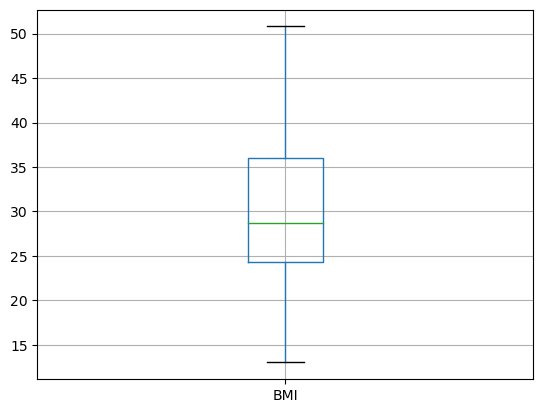

In [13]:
# seperate quanlity and quaity values:

num_list = ["Age", "Height", "Weight", "BMI"]
cato_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
             'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# creates a box plot for each numerical variable in the num_list.
for i in range(len(num_list)):
    obesity_pd.boxplot(column = num_list[i])
    plt.show()

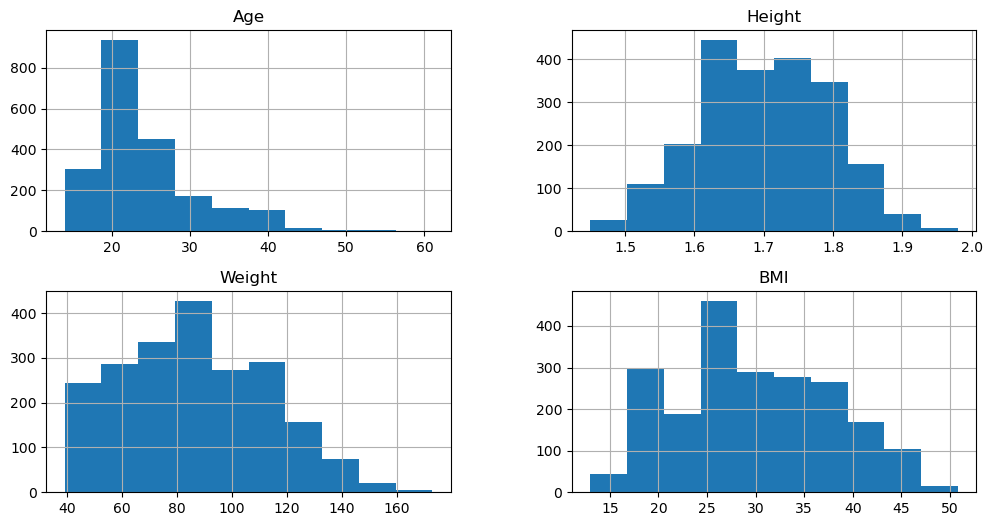

In [14]:
# creates a histogram for each numerical variable in the num_list.
obesity_pd[num_list].hist(figsize = (12,6))
plt.show()

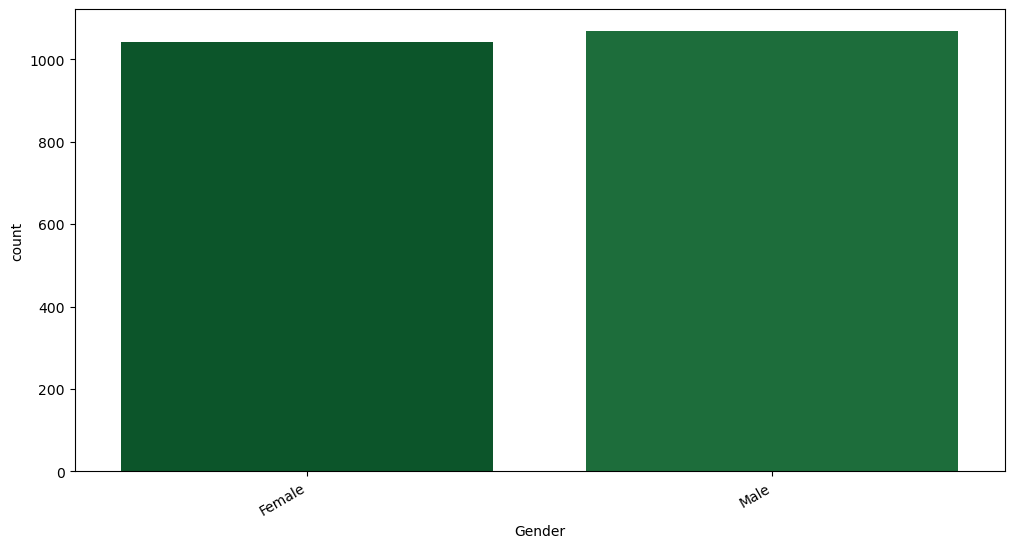

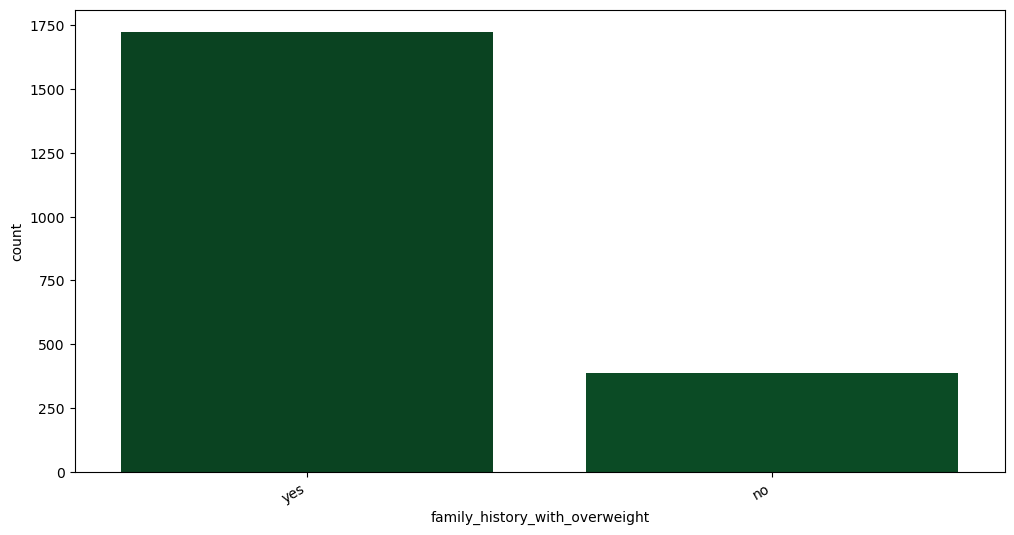

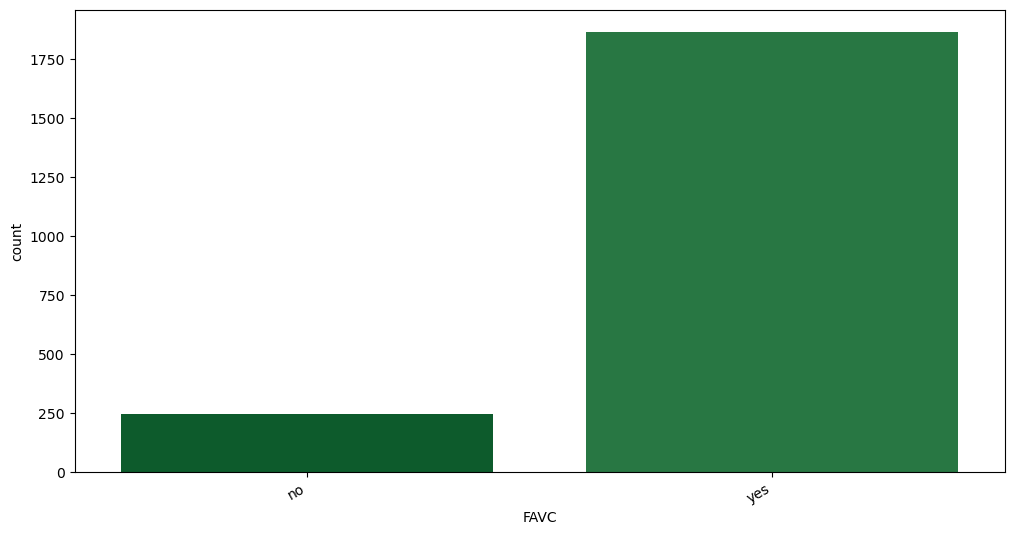

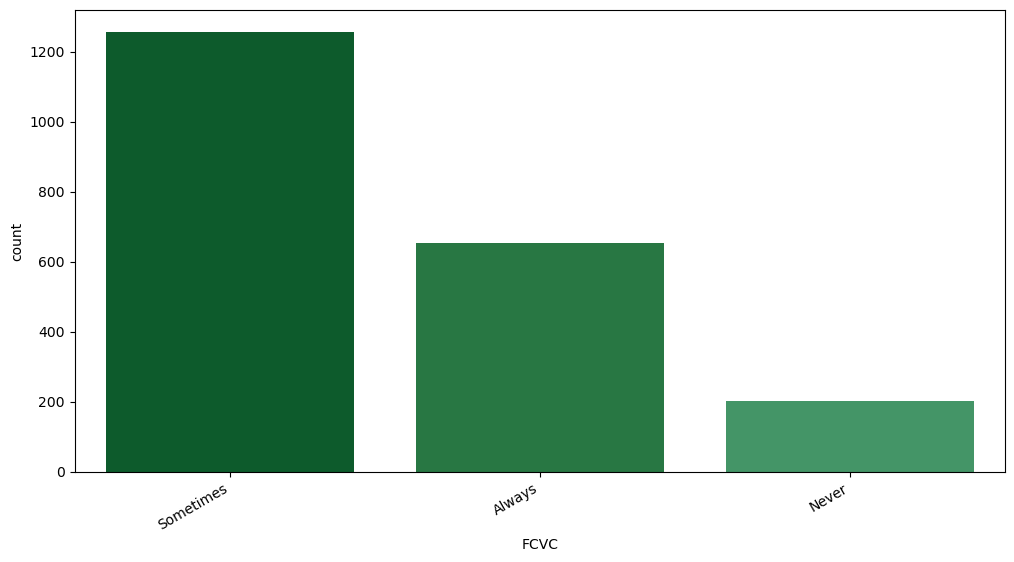

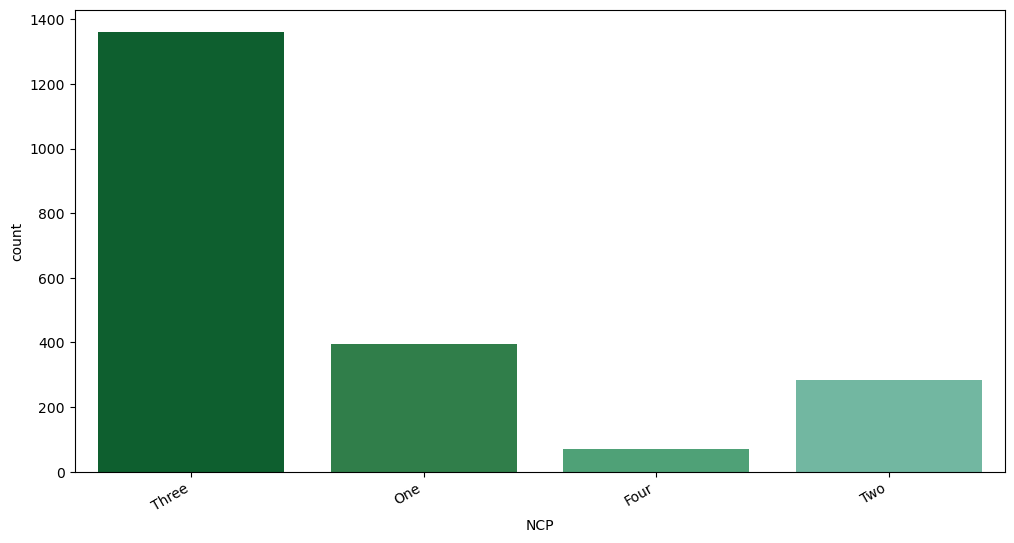

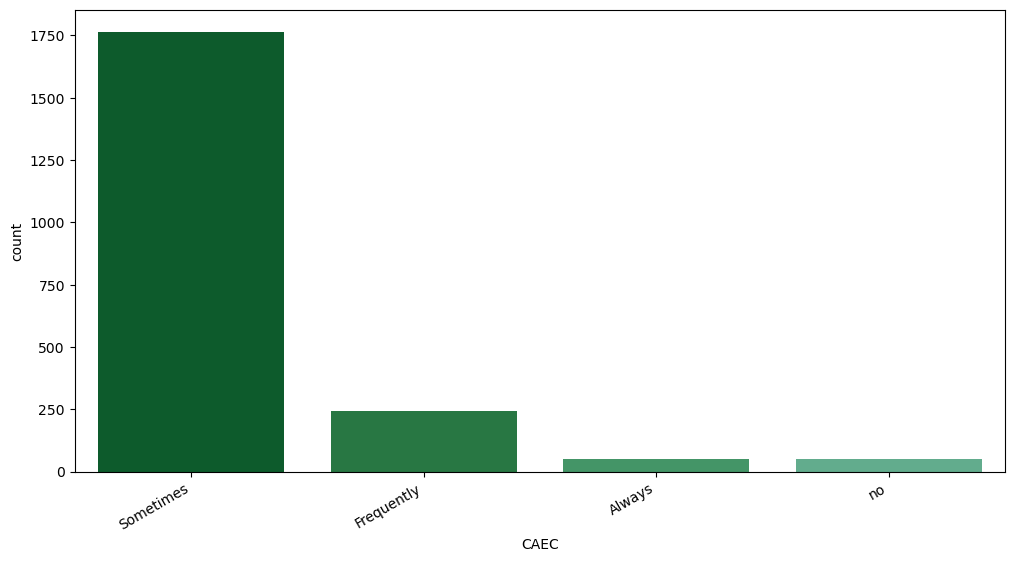

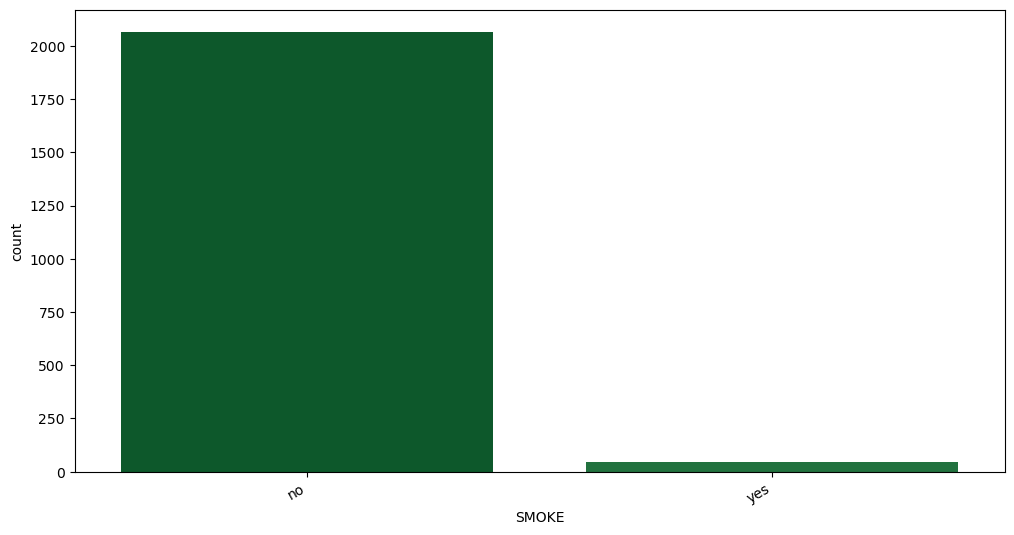

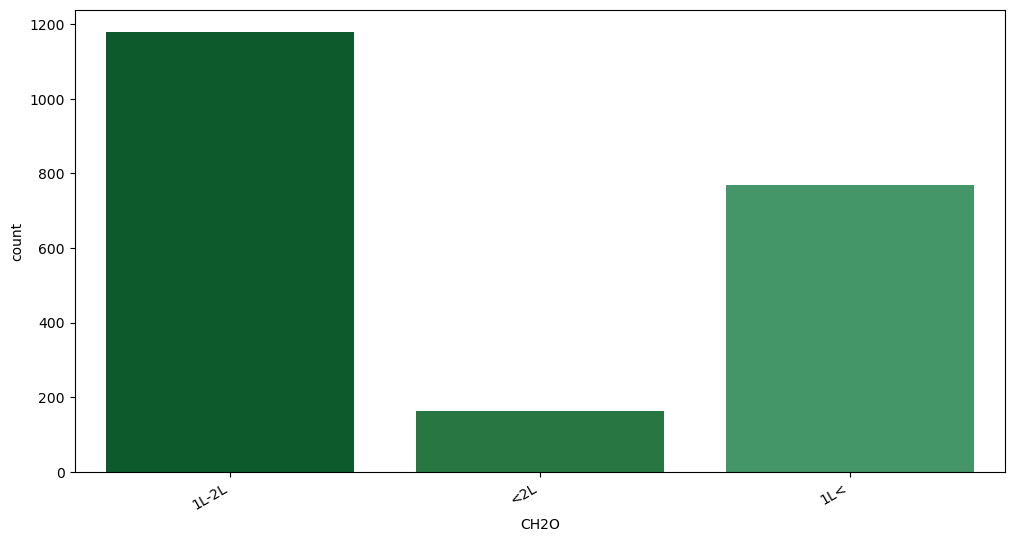

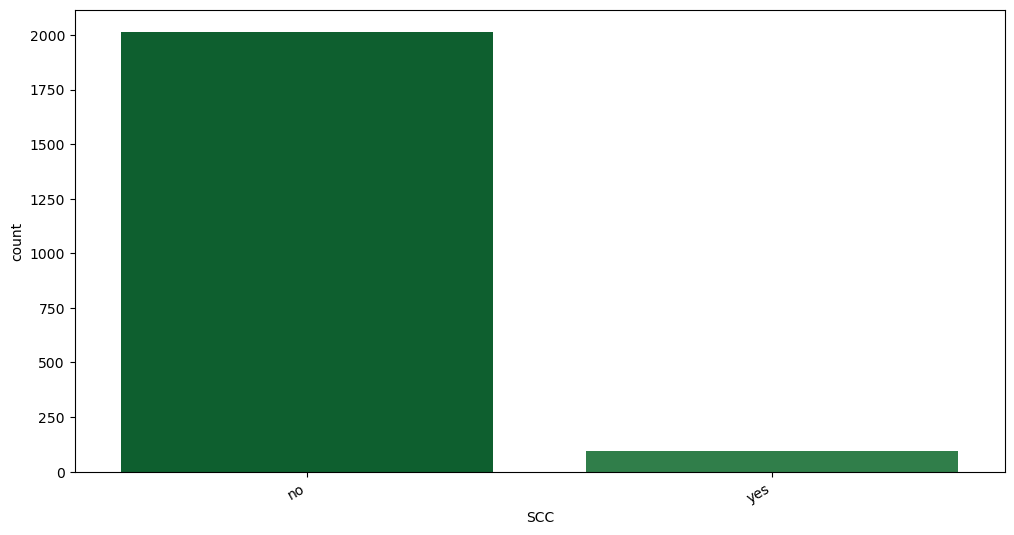

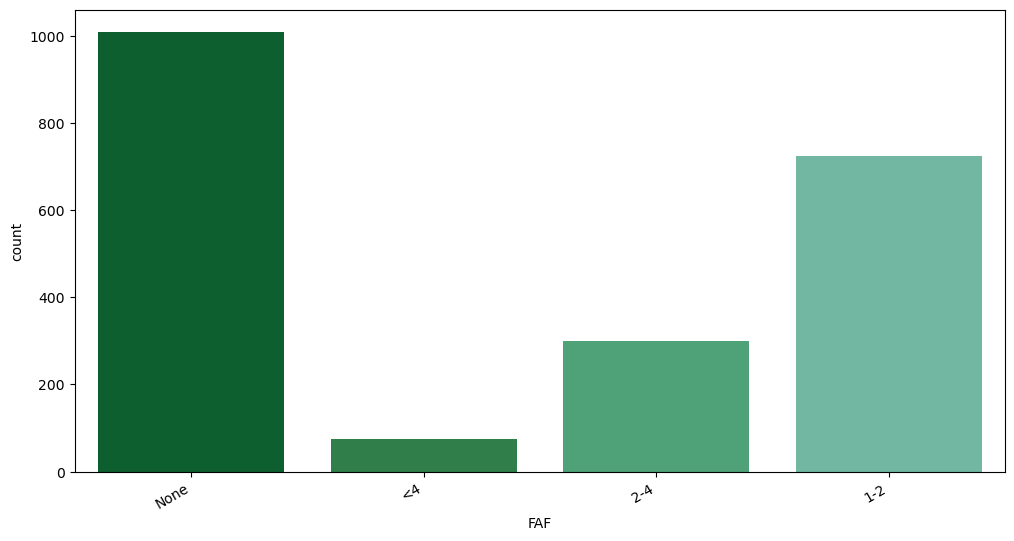

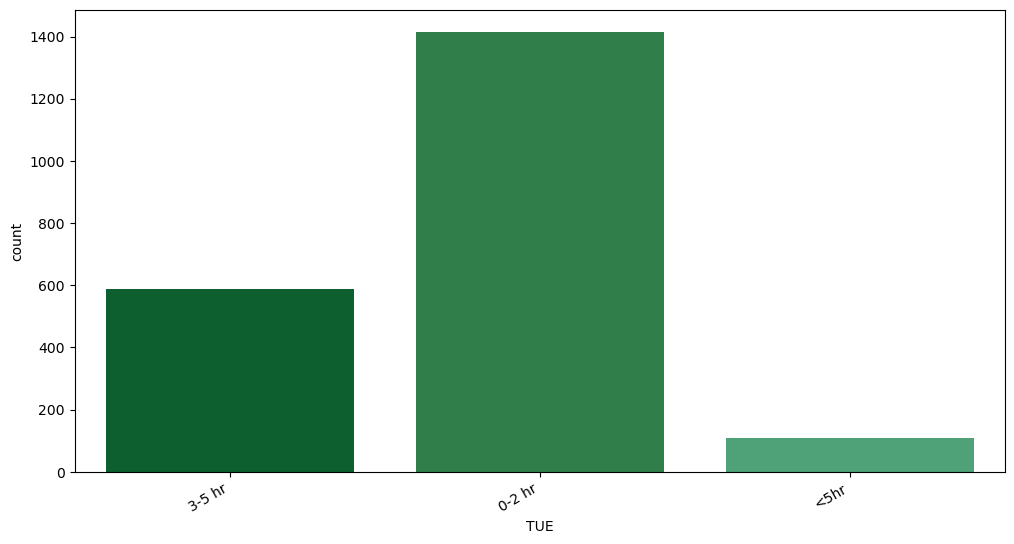

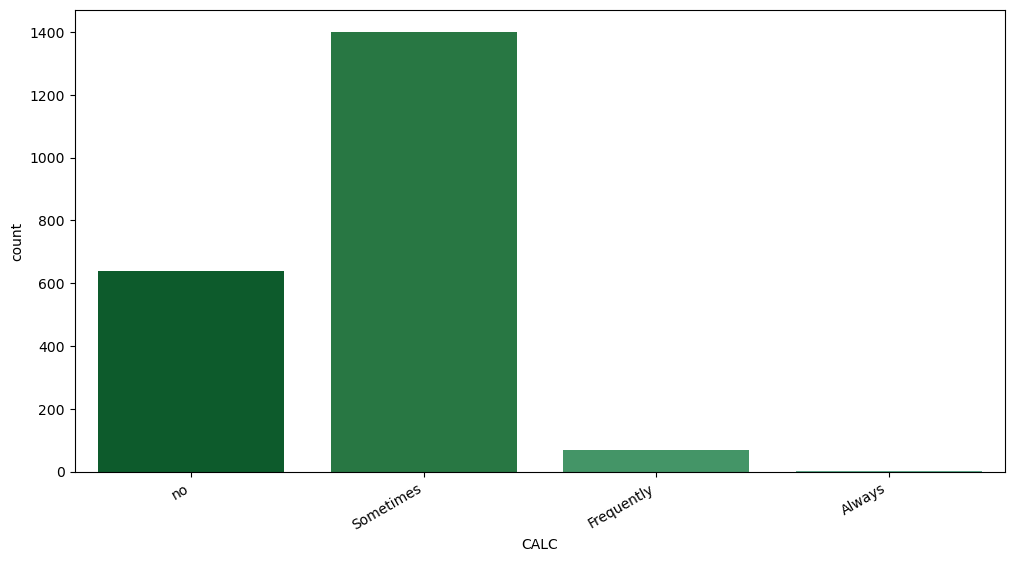

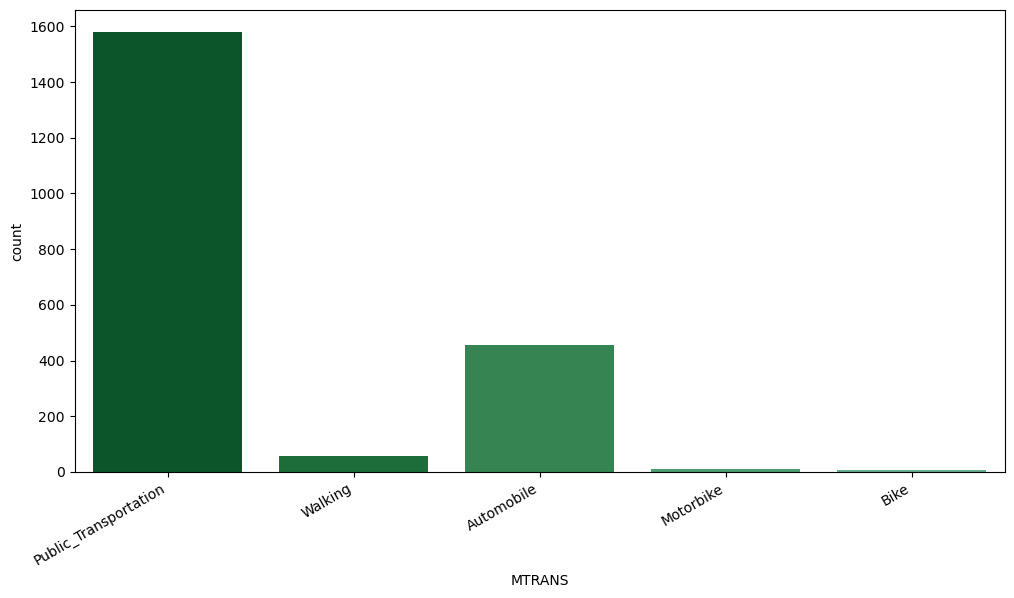

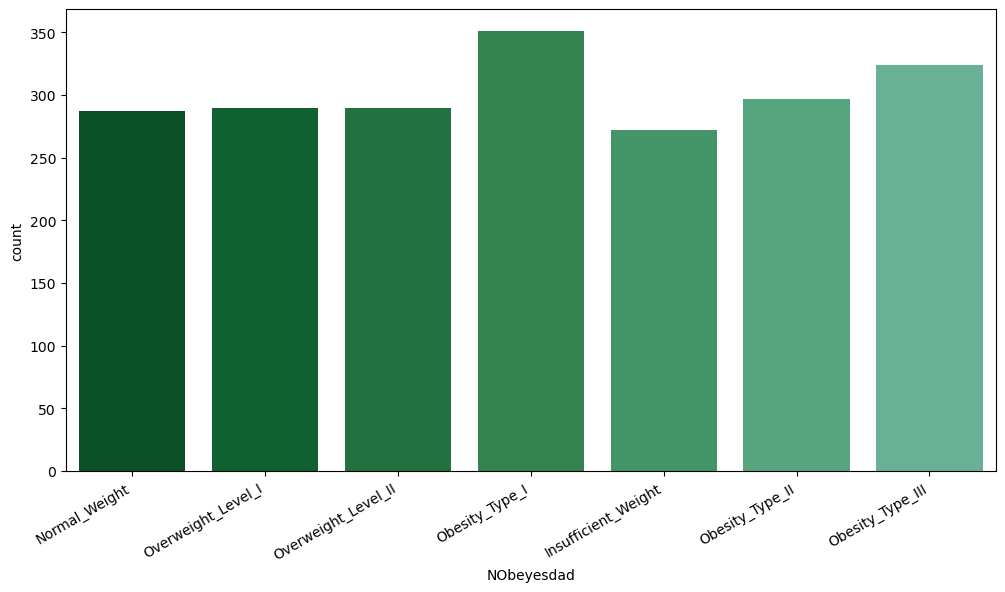

In [15]:
# draw bar graph accordingly
for i in range(len(cato_list)):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x= cato_list[i], data = obesity_pd, palette=sns.color_palette("BuGn_r", n_colors=len(cato_list[i]) + 4))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

In [16]:
obesity_pd.plot.scatter(x = "Age", y = 'BMI',c = 'red')

<AxesSubplot:xlabel='Age', ylabel='BMI'>

In [17]:
# calculates the mean BMI for each age group in the obesity_pd dataframe 
# and creates a line plot of Age vs BMI 
obserity_age_pd = obesity_pd.groupby(["Age"], as_index = False)['BMI'].mean()
obserity_age_pd.plot.line(x = "Age", y = 'BMI',c = 'red')

<AxesSubplot:xlabel='Age'>

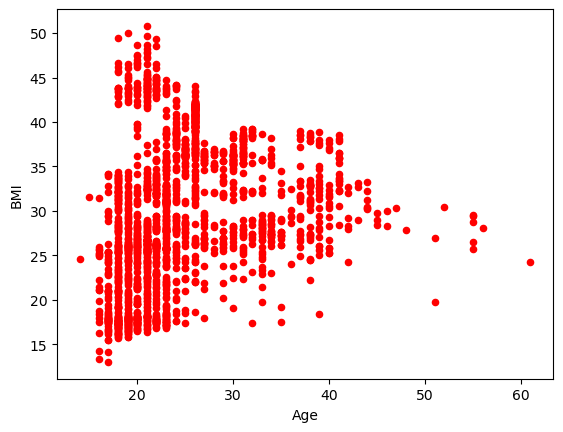

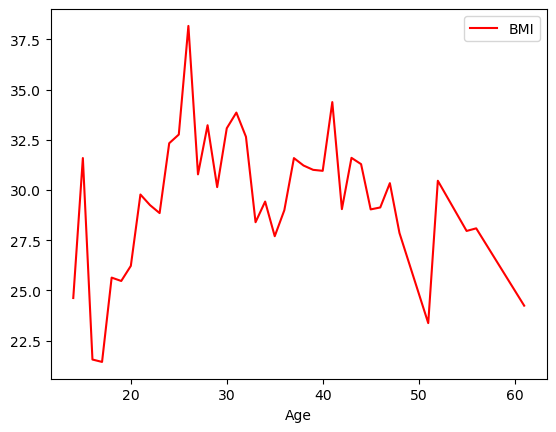

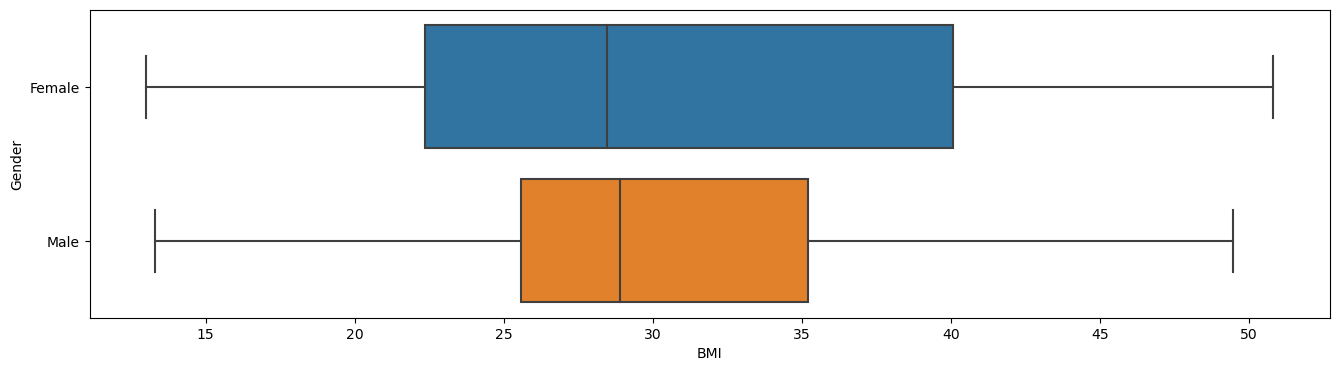

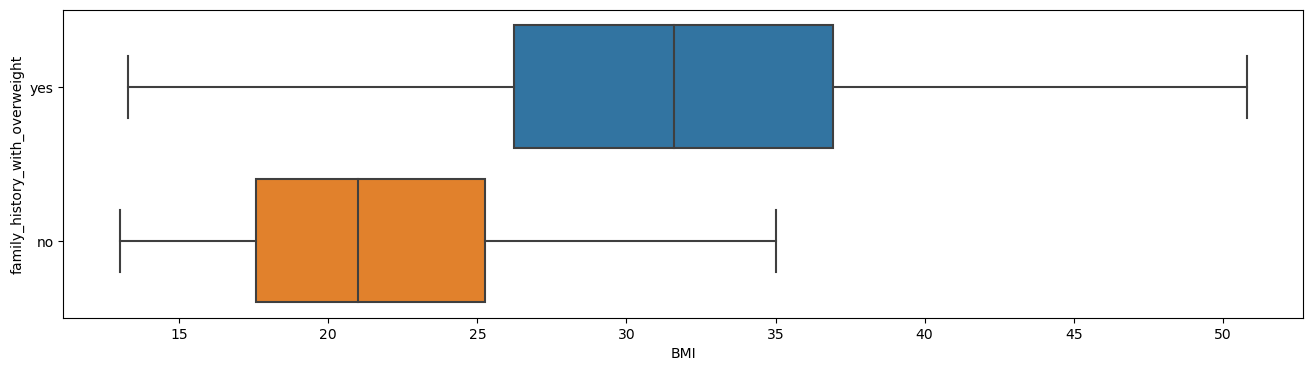

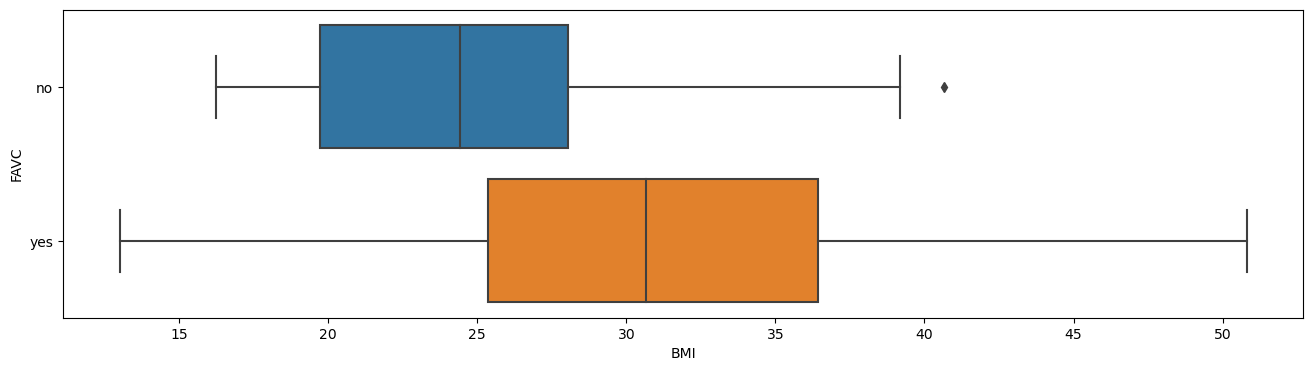

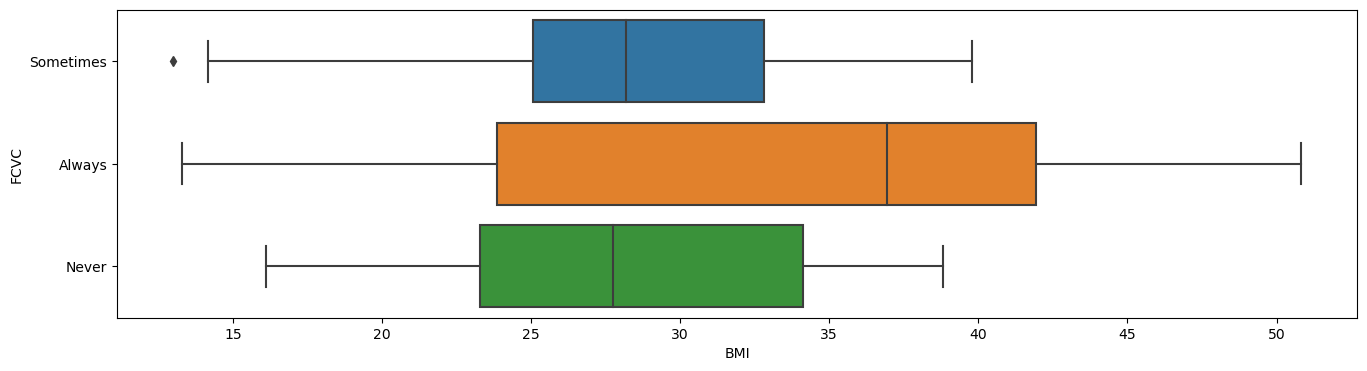

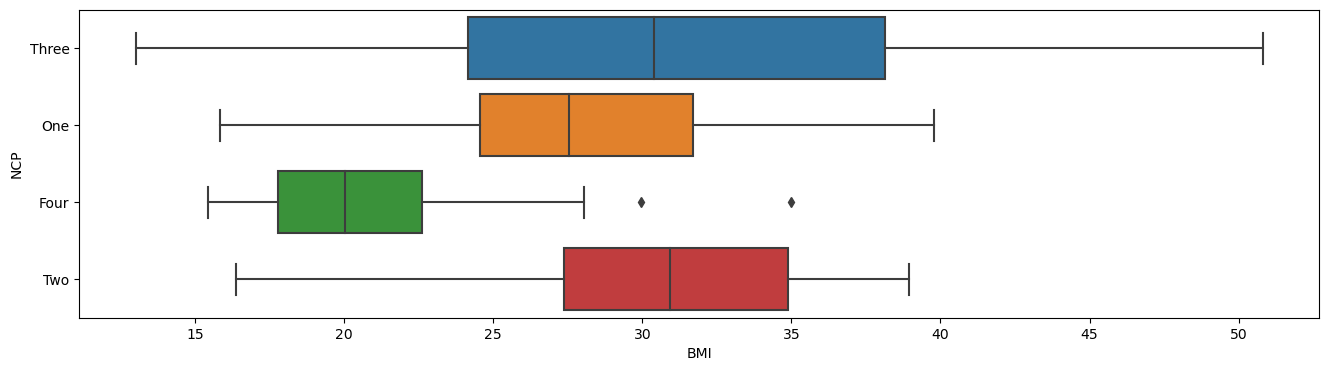

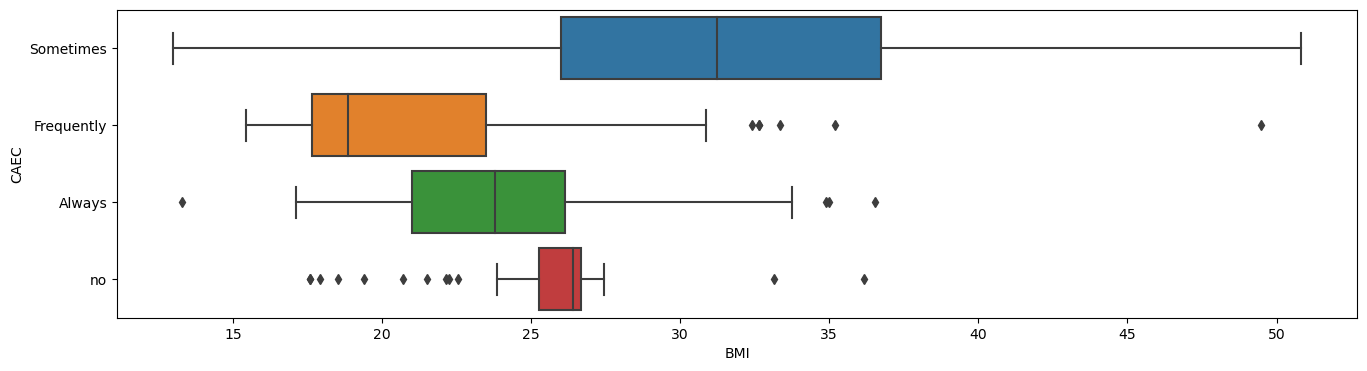

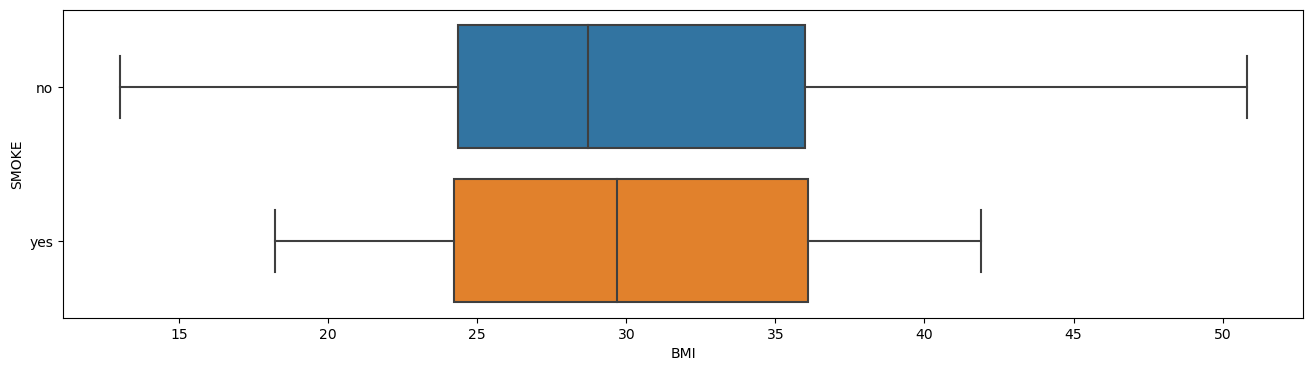

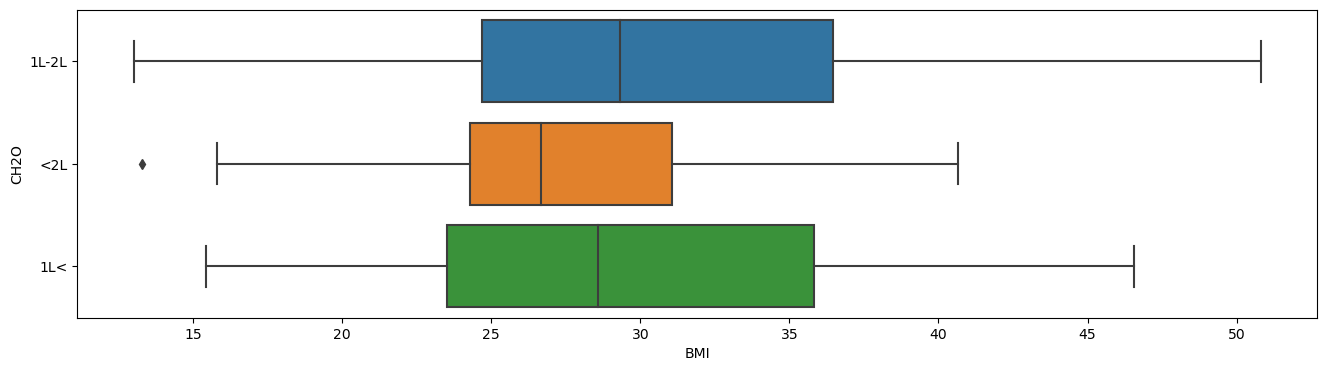

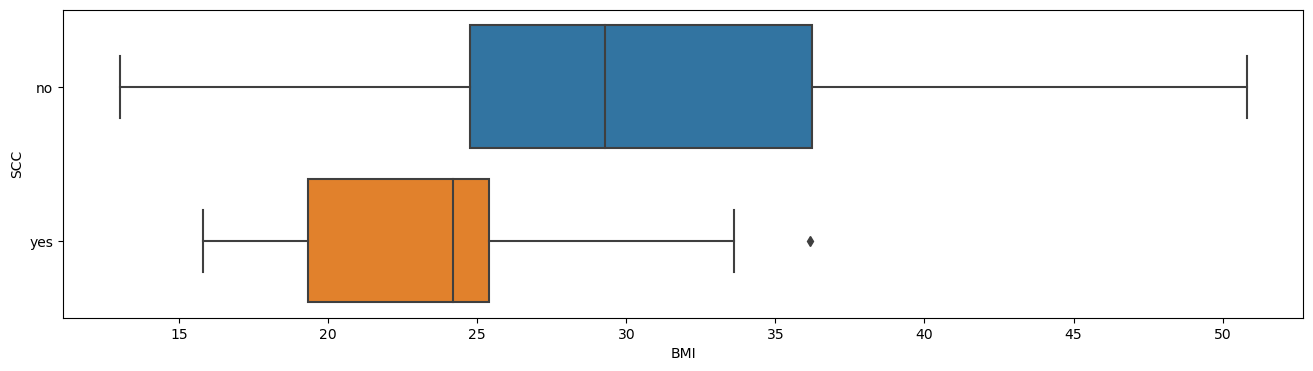

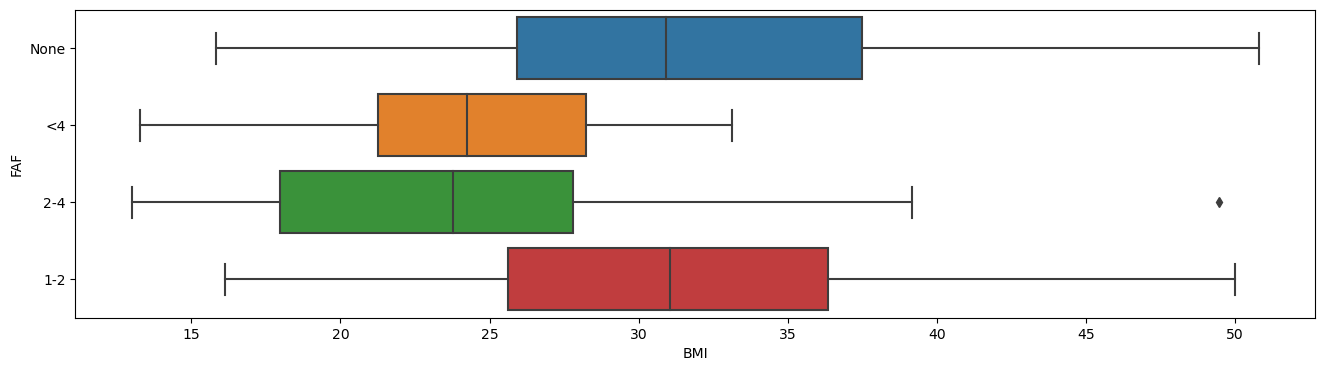

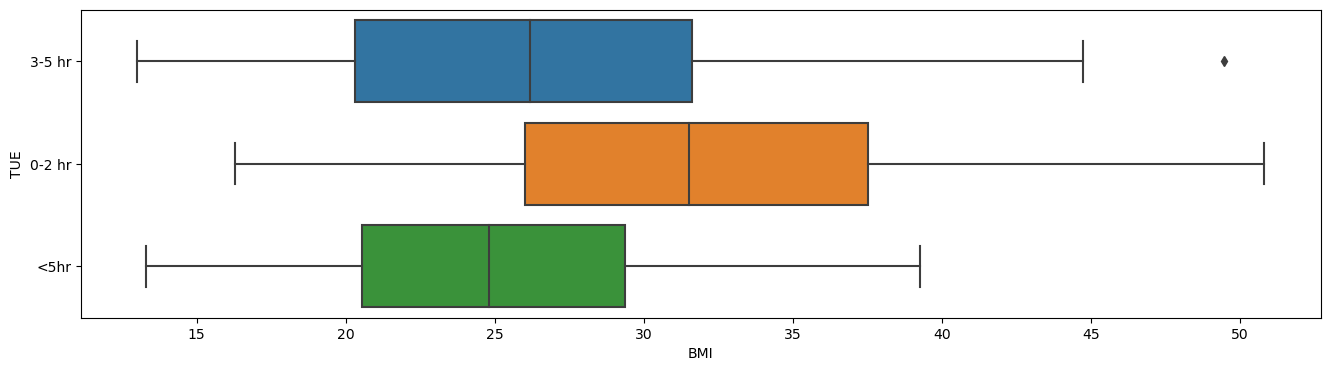

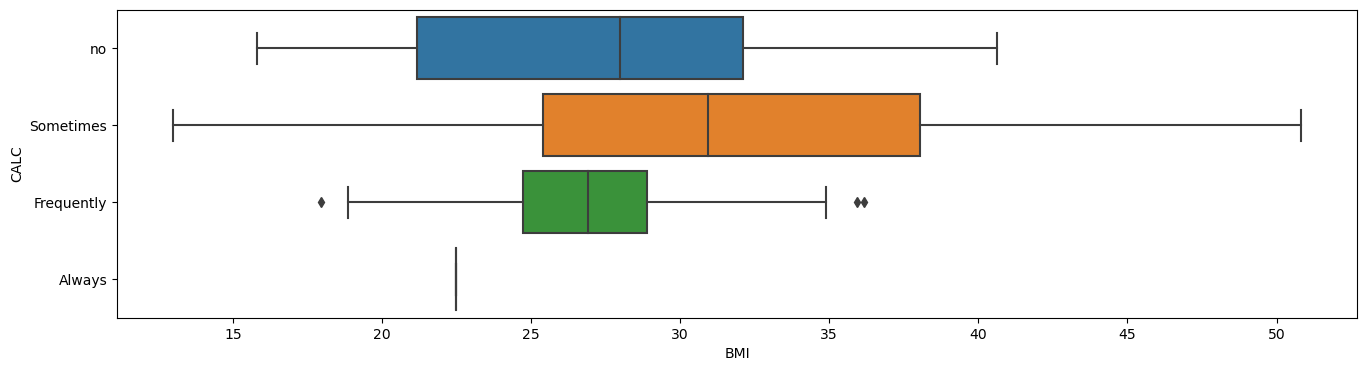

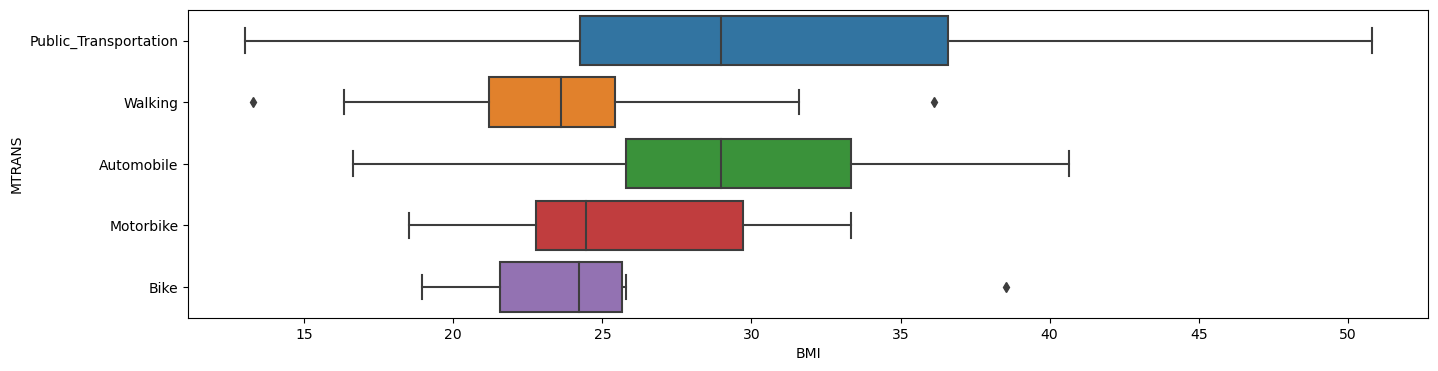

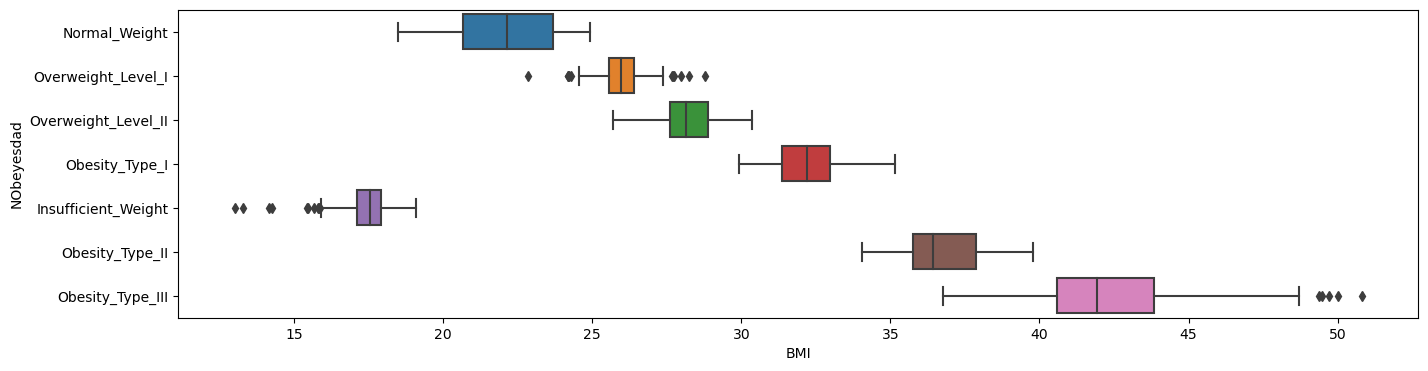

In [18]:
# creates a box plot for each categorical variable in the cato_list.
for i in range(len(cato_list)):
    plt.figure(figsize=(16, 4))
    sns.boxplot(x = 'BMI', y = cato_list[i], data = obesity_pd)
    plt.show()

# Model Implementation

First, we use one hot encoding to convert all qualitiative data into numeric quantitative data

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [20]:
# mapping the categorical to binary values 

obesity_pd["Gender"] = obesity_pd["Gender"].map({"Male": 1, "Female": 0})
obesity_pd["family_history_with_overweight"] = obesity_pd["family_history_with_overweight"].map({"yes": 1, "no": 0})
obesity_pd["FAVC"] = obesity_pd["FAVC"].map({"yes": 1, "no": 0})
obesity_pd["SMOKE"] = obesity_pd["SMOKE"].map({"yes": 1, "no": 0})
obesity_pd["SCC"] = obesity_pd["SCC"].map({"yes": 1, "no": 0})

# creates dummy variables for several columns in the 
columns = ["FCVC", "NCP", "CAEC", "CH2O", "FAF", "TUE", "CALC", "MTRANS"]
obesity_pd = pd.get_dummies(data=obesity_pd, columns = columns)

# creates a new column called "Obesity".
obesity_pd["Obesity"] = obesity_pd["BMI"].apply(lambda x: 1 if x > 30 else 0)


In [21]:
obesity_pd

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,SMOKE,SCC,NObeyesdad,BMI,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Obesity
0,0,21,1.62,64.00,1,0,0,0,Normal_Weight,24.39,...,0,0,0,1,0,0,0,1,0,0
1,0,21,1.52,56.00,1,0,1,1,Normal_Weight,24.24,...,0,0,1,0,0,0,0,1,0,0
2,1,23,1.80,77.00,1,0,0,0,Normal_Weight,23.77,...,0,1,0,0,0,0,0,1,0,0
3,1,27,1.80,87.00,0,0,0,0,Overweight_Level_I,26.85,...,0,1,0,0,0,0,0,0,1,0
4,1,22,1.78,89.80,0,0,0,0,Overweight_Level_II,28.34,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,0,0,Obesity_Type_III,44.90,...,0,0,1,0,0,0,0,1,0,1
2107,0,22,1.75,133.74,1,1,0,0,Obesity_Type_III,43.74,...,0,0,1,0,0,0,0,1,0,1
2108,0,23,1.75,133.69,1,1,0,0,Obesity_Type_III,43.54,...,0,0,1,0,0,0,0,1,0,1
2109,0,24,1.74,133.35,1,1,0,0,Obesity_Type_III,44.07,...,0,0,1,0,0,0,0,1,0,1


### Classfication Choice 

In [22]:
# initializes machine learning models

logistic_regression = LogisticRegression()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
Extra_trees = ExtraTreesClassifier()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

classifiers = [
    logistic_regression,
    gradient_boosting,
    ada_boost,
    random_forest,
    Extra_trees,
    decision_tree,
    svm
]


### Hyperparameter Tuning

In [23]:
# Define parameter grids and implement hyperparameter tuning
param_grids = {
    "LogisticRegression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
    },
    "GradientBoostingClassifier": {
        "learning_rate": [0.001, 0.01, 0.1, 1],
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 10, 20, 30]
    },
    "AdaBoostClassifier": {
        "learning_rate": [0.001, 0.01, 0.1, 1],
        "n_estimators": [10, 50, 100, 200]
    },
    "ExtraTreesClassifier": {
        "min_samples_split": [2, 4, 6, 8],
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 10, 20, 30]
    },
    "DecisionTreeClassifier": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_leaf": [1, 2, 4, 8, 16]
    },
    "RandomForestClassifier": {
        "max_depth": [None, 10, 20, 30],
        "n_estimators": [10, 50, 100, 200]
    },
    "SVC": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto"],
        "degree": [2, 3, 4]
    }
}


### Model Selection

In [24]:
# Set x and y
X = obesity_pd.drop(columns=["Obesity", "BMI", "Weight", "Height", "NObeyesdad"])
y = obesity_pd["Obesity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Rescaling

By rescaling, we aim to normalize the range of values of each feature to the same scale, so that they contribute equally to the model. 

In [25]:
# Scale data
scaler = StandardScaler()

continous_cols = list(X_train.nunique()[X_train.nunique() > 2].index)
scaler.fit(X_train[continous_cols])
X_train[continous_cols] = scaler.transform(X_train[continous_cols])
X_test[continous_cols] = scaler.transform(X_test[continous_cols])

### PCA

The dataset originally contains over 30 features, which can be challenging to work with. By applying PCA, we can reduce the dimensionality of the dataset, which can help to prevent overfitting and improve computational efficiency. 

In [26]:
# find the shape before pca
X_train.shape

(1688, 36)

In [27]:
X_train.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'FCVC_Always', 'FCVC_Never', 'FCVC_Sometimes', 'NCP_Four',
       'NCP_One', 'NCP_Three', 'NCP_Two', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CH2O_1L-2L', 'CH2O_1L<', 'CH2O_<2L',
       'FAF_1-2', 'FAF_2-4', 'FAF_<4', 'FAF_None', 'TUE_0-2 hr', 'TUE_3-5 hr',
       'TUE_<5hr', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(X_train)

# Transform data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
# find the shape before pca
X_train_pca.shape

(1688, 23)

In [30]:
X_test_pca.shape

(423, 23)

### Comparing Models

We used GridsearchCV to perform hyperparameter tuning by maximizing cross validation score and then choose the best model by finding the highest accuracy score.

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Create an empty list to store accuracy scores
accuracy_scores = []

for clf in classifiers:
    # Get name of classifier
    clf_name = clf.__class__.__name__
    
    # Check if classifier is in parameter grids
    if clf_name in param_grids:
        param_grid = param_grids[clf_name]
        
        # set GridSearchCV 
        grid_search = GridSearchCV(
            clf,
            param_grid,
            cv=5,
        )
        
        grid_search.fit(X_train_pca, y_train)
        
        # Print best hyperparameters and corresponding score
        print(f"Best hyperparameters for {clf_name}: ", grid_search.best_params_)
        print(f"Best score for {clf_name}: ", grid_search.best_score_)
        
        # Set classifier to best hyperparameters
        clf.set_params(**grid_search.best_params_)
    
    # Train model
    clf.fit(X_train_pca, y_train)
    
    # Classification Report
    y_pred = clf.predict(X_test_pca)
    print(f"Classification report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    print("---------------------")
    
    # Calculate accuracy score and append to list
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)


Best hyperparameters for LogisticRegression:  {'C': 100, 'penalty': 'l2'}
Best score for LogisticRegression:  0.7766386318543361
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       228
           1       0.70      0.82      0.75       195

    accuracy                           0.75       423
   macro avg       0.76      0.76      0.75       423
weighted avg       0.76      0.75      0.75       423

---------------------
Best hyperparameters for GradientBoostingClassifier:  {'learning_rate': 1, 'max_depth': 10, 'n_estimators': 200}
Best score for GradientBoostingClassifier:  0.9040226151387987
Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       228
           1       0.92      0.87      0.89       195

    accuracy                           0.91       423
   macro avg       0.91     

#### 1. Comparing using accuracy score

creates a bar chart comparing the accuracy scores of several machine learning models. 

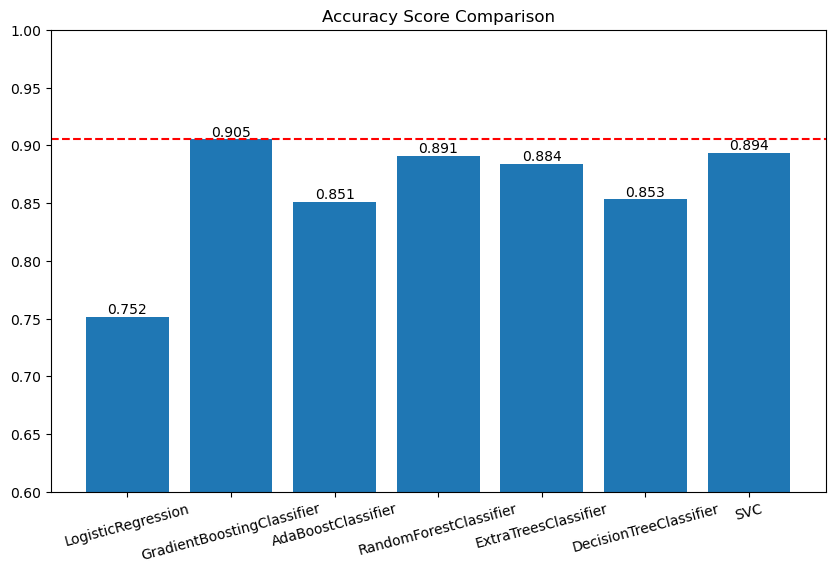

In [33]:
model_names = [clf.__class__.__name__.split()[0] for clf in classifiers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, accuracy_scores)

ax.set_xticks(range(len(model_names))) # Set the x-ticks
ax.set_xticklabels(model_names, rotation=15)

ax.set_title('Accuracy Score Comparison') # Add title

ax.set_ylim(0.6, 1) # Set x-axis limits

# Find the index of the highest accuracy score
max_index = accuracy_scores.index(max(accuracy_scores))

# Add the highest accuracy score
ax.axhline(y=accuracy_scores[max_index], color='red', linestyle='--')

# Annotate the bar with corresponding accuracy score
for i, score in enumerate(accuracy_scores):
    ax.text(i, score, round(score, 3), ha='center', va='bottom')

plt.show()


#### 2. Feature Importance

Find the best model to display feature importance. If the chosen model doesn't have a feature importance, disregard it and move on to the next best option.

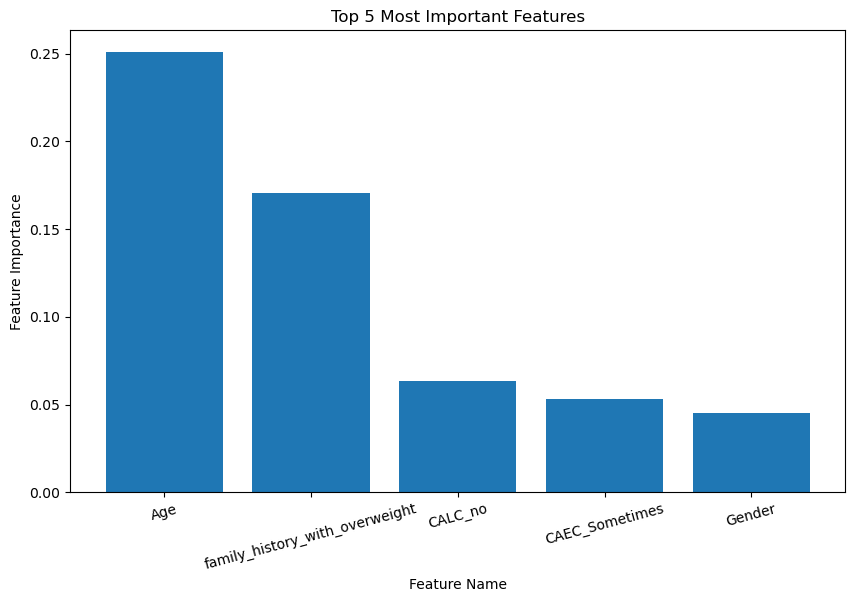

In [35]:
# Sort the accuracy scores in descending order and get the best index
sorted_idx = np.argsort(accuracy_scores)[::-1]

# Find the best classifier with feature_importances_ attribute
best_clf = None
for idx in sorted_idx:
    if hasattr(classifiers[idx], 'feature_importances_'):
        best_clf = classifiers[idx]
        break

# If the best_clf is found, continue with the analysis
if best_clf:
    # Train the best classifier on the dataset
    best_clf.fit(X_test, y_test)

    # Get feature importances and names
    feat_importance = best_clf.feature_importances_
    feat_names = X_test.columns

    # Sort feature importances in descending order
    sorted_idx = feat_importance.argsort()[::-1]

    # Plot the top 5 most important features
    plt.figure(figsize=(10, 6))  # Set figure size to 10 inches wide by 6 inches tall
    plt.bar(range(5), feat_importance[sorted_idx][:5])
    plt.xticks(range(5), feat_names[sorted_idx][:5], rotation=15)  # Rotate x-axis labels by 15 degrees
    plt.xlabel("Feature Name")
    plt.ylabel("Feature Importance")
    plt.title("Top 5 Most Important Features")
    plt.show()
else:
    print("No classifier with feature_importances_ attribute found.")
